<a href="https://colab.research.google.com/github/harigovind17/Stock-Prediction-using-KNN/blob/main/Finsire_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finsire Assignment

About the Dataset:
Bank Marketing Dataset

The dataset, from the UCI ML Repository, provides insights into a financial institution's marketing campaign. Analyzing it aims to enhance future strategies for improved marketing outcomes.


Problem Statement:

The goal is to predict if the customer will subscribe to a term deposit (variable Y)



In [2]:
# importing necesary dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
import plotly.express as px
from plotly.offline import iplot
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/bank.csv")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


# Description of Dataset

1. age: Represents the age of the individual.

2. job: Describes the occupation or job of the person.

3. marital: Indicates the marital status of the person (e.g., married, single, divorced).

4. education: Represents the educational level of the person (e.g., primary, secondary, tertiary).

5. default: Indicates whether the person has credit in default ('yes', 'no', or 'unknown').

6. housing: Shows whether the person has a housing loan ('yes', 'no', or 'unknown').

7. loan: Indicates whether the person has a personal loan ('yes', 'no', or 'unknown').

8. contact: Describes the method of communication used to contact the person (e.g., 'cellular', 'telephone').

9. day: Indicates the day of the week of the last contact.

10. month: Represents the month of the last contact.

11. Duration: Represents the duration of the last contact in seconds.

12. campaign: Indicates the number of contacts made during this campaign.

13. pdays: Describes the number of days since the person was last contacted or -1 if they were not previously contacted.

14. previous: Represents the number of contacts made before this campaign.

15. poutcome: Indicates the outcome of the previous marketing campaign.

16. deposit: The target variable, indicating whether the person subscribed to a term deposit ('yes' or 'no')gn.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Data Cleaning

In [6]:
#checking for null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
#checking for unique values
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [8]:
df.duplicated().sum()

0

# Exploratory Data Analysis

In [7]:
fig = px.histogram(df["age"],
                   nbins=20,
                   color_discrete_sequence=["#FFA07A"],
                   labels = {"value" :"Ages", "count" : "Frequency"},
                   title="The Distribution of Ages",text_auto=True)

fig.update_layout(showlegend = False,title = {"font": {"size": 26,"family": "tahoma",}})
fig.update_traces(textfont= {"family": "consolas","size": 14}, hovertemplate = "Age Range: %{x}<br>Frequency: %{y}",marker = {"line": {"color": "#333", "width":1}} )

iplot(fig)

In [8]:
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [9]:
df=df[df['job']!='unknown']
df.job = df.job.str.replace(".", "")

In [10]:
#finding the mean age per profession
age_job=pd.pivot_table(df, values='age', index='job', aggfunc='mean')
print(age_job)

                     age
job                     
admin          39.374063
blue-collar    39.505144
entrepreneur   42.887195
housemaid      47.445255
management     40.218239
retired        65.424165
self-employed  39.809877
services       38.141928
student        26.102778
technician     39.001646
unemployed     40.997199


<Figure size 1200x800 with 0 Axes>

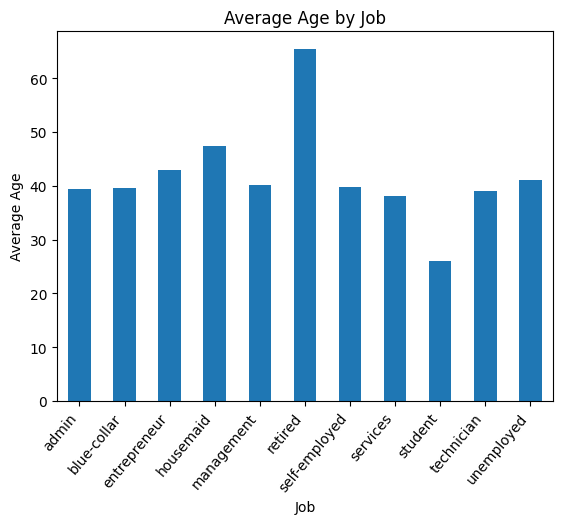

In [11]:
plt.figure(figsize=(12,8))
age_job.plot(kind='bar', legend=False)
plt.title('Average Age by Job')
plt.xlabel('Job')
plt.ylabel('Average Age')
plt.xticks(rotation=50, ha='right')
plt.show()

In [11]:
pd.crosstab(df.job,columns=df.education,values=df.age,aggfunc='mean').round(0)

education,primary,secondary,tertiary,unknown
job,,,,
admin,48.0,40.0,35.0,46.0
blue-collar,42.0,38.0,36.0,43.0
entrepreneur,46.0,43.0,42.0,46.0
housemaid,50.0,45.0,42.0,54.0
management,48.0,42.0,39.0,48.0
retired,67.0,64.0,64.0,70.0
self-employed,45.0,40.0,38.0,51.0
services,44.0,37.0,37.0,43.0
student,23.0,25.0,28.0,27.0


In [12]:
df=df[df['education']!='unknown']
df.education.value_counts()

secondary    5461
tertiary     3680
primary      1493
Name: education, dtype: int64

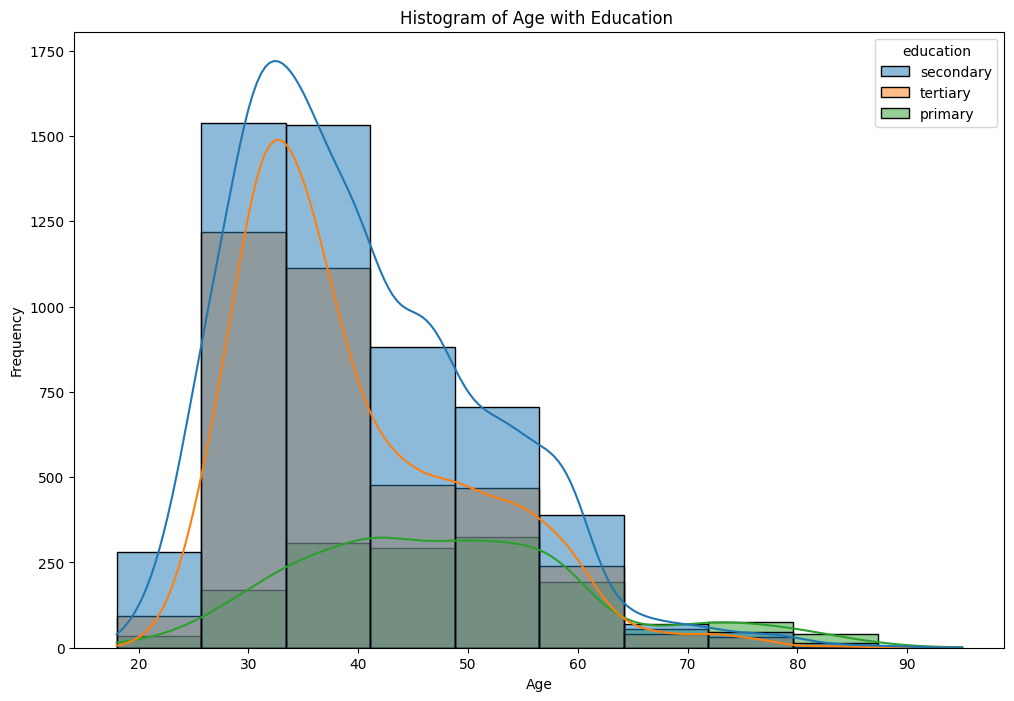

In [21]:
plt.figure(figsize=(12,8))
sb.histplot(data=df, x=df.age, hue=df.education, bins=10,kde=True)

plt.title('Histogram of Age with Education ')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [22]:
print(df.default.unique())
df.default.value_counts()

['no' 'yes']


no     10475
yes      159
Name: default, dtype: int64

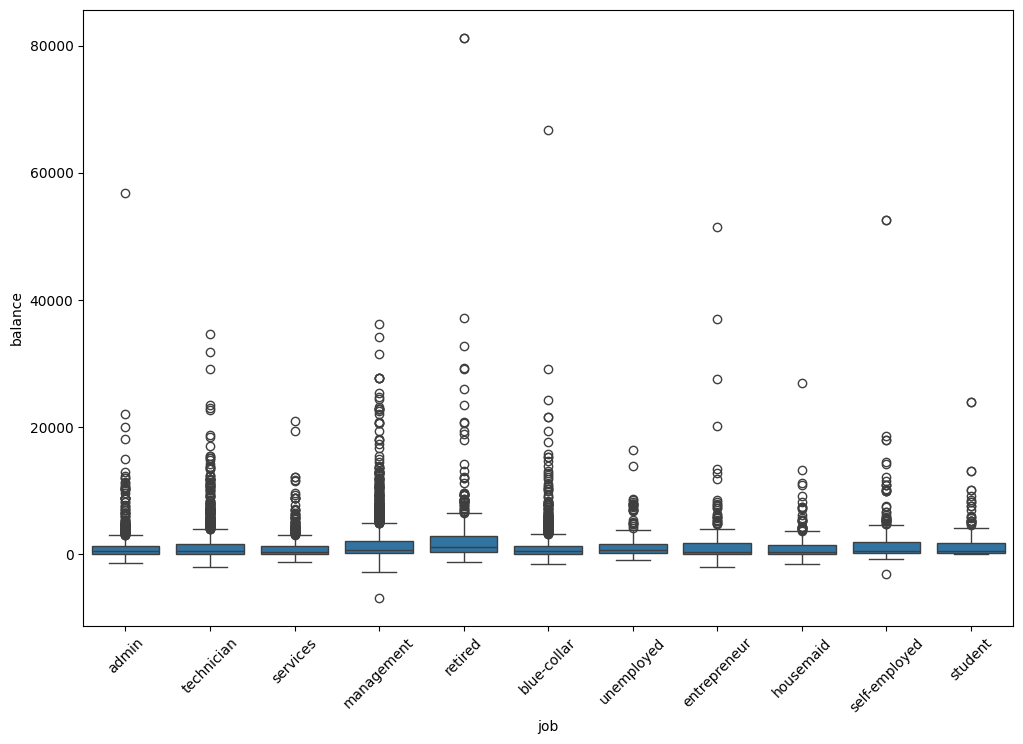

In [28]:
plt.figure(figsize=(12,8))
sb.boxplot(data=df,x=df.job,y=df.balance)
plt.xticks(rotation=45)
plt.show()

In [13]:
df[df['balance']==df.balance.max()]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3043,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
3380,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes


In [14]:
df[df['balance']==df.balance.min()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
6797,49,management,married,tertiary,yes,-6847,no,yes,cellular,21,jul,206,1,-1,0,unknown,no


In [15]:
df=df[df.balance>0]

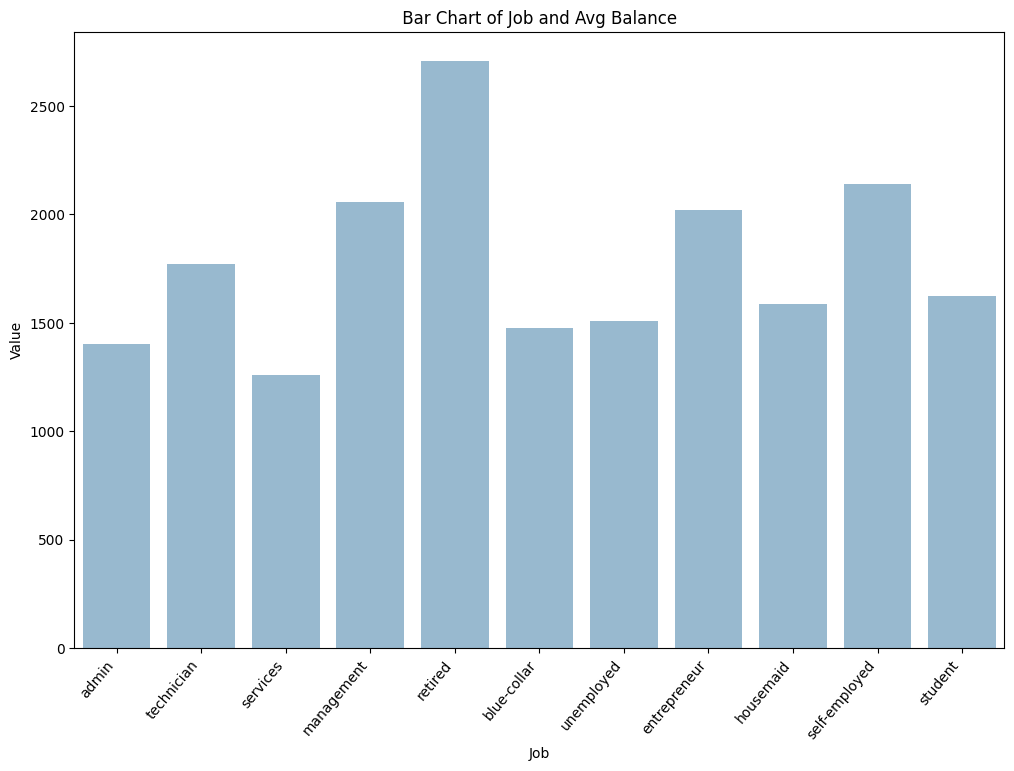

In [34]:
plt.figure(figsize=(12, 8))
sb.barplot(x='job', y='balance', data=df, alpha=0.5, ci=None)

# Set plot labels and title
plt.title(' Bar Chart of Job and Avg Balance ')
plt.xlabel('Job')
plt.ylabel('Value')

plt.xticks(rotation=50, ha='right')

# Show the plot
plt.show()

In [16]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

In [17]:
df.housing.value_counts()

no     4945
yes    4275
Name: housing, dtype: int64

In [18]:
df.loan.unique()

array(['no', 'yes'], dtype=object)

In [19]:
df.loan.value_counts()

no     8112
yes    1108
Name: loan, dtype: int64

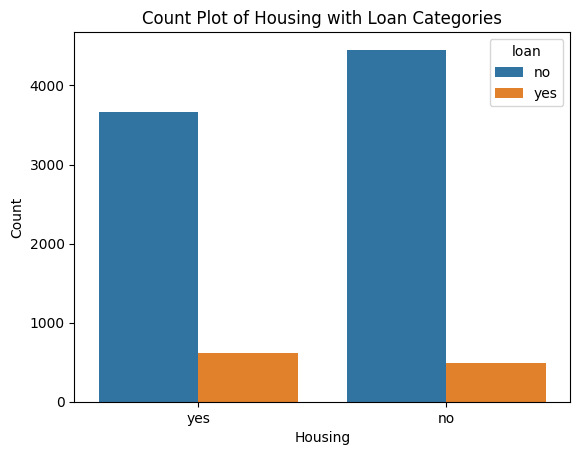

In [40]:
# Create a count plot
sb.countplot(data=df, x='housing', hue='loan')

# Add labels and a title
plt.xlabel('Housing')
plt.ylabel('Count')
plt.title('Count Plot of Housing with Loan Categories')

# Show the plot
plt.show()

In [41]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [42]:
df.contact.value_counts()

cellular     6718
unknown      1867
telephone     635
Name: contact, dtype: int64

In [43]:
df.month.value_counts()

may    2274
aug    1271
jul    1130
jun    1015
nov     818
apr     790
feb     673
oct     339
jan     284
sep     274
mar     252
dec     100
Name: month, dtype: int64

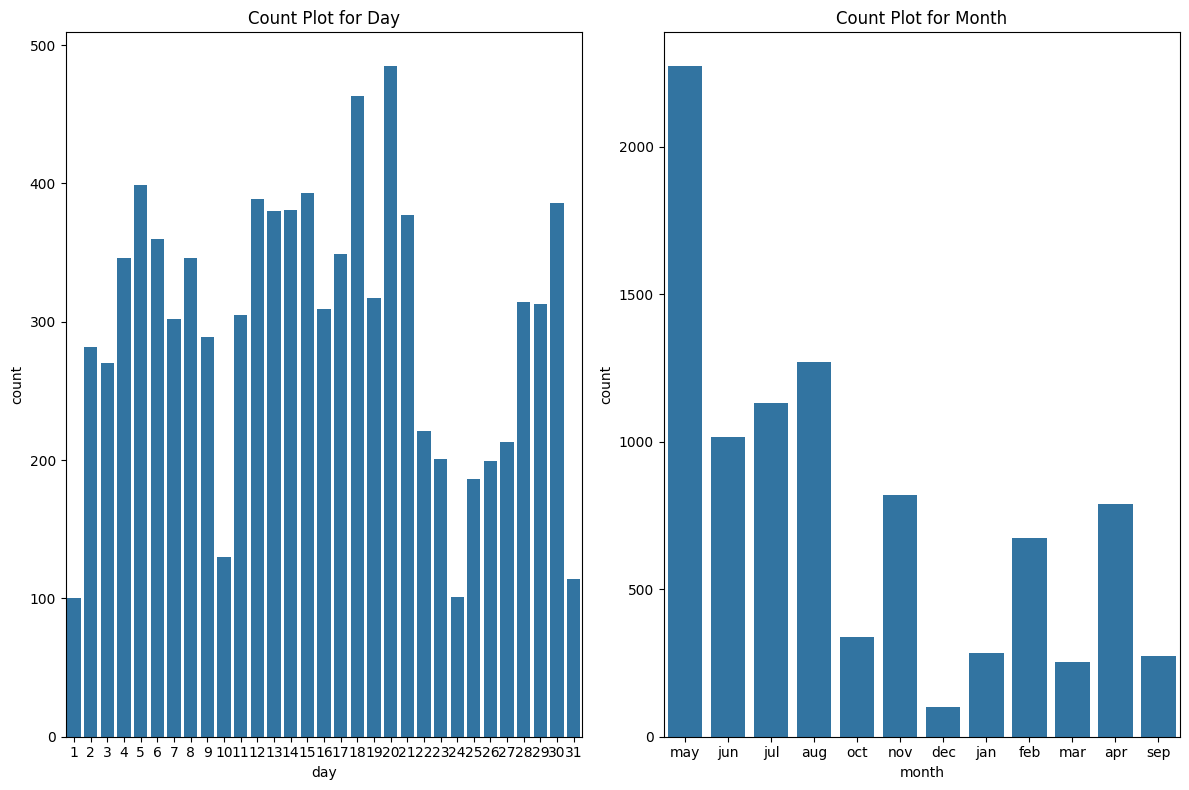

In [45]:
# Create a figure with two subplots
plt.figure(figsize=(12, 8))

# Subplot 1: Count plot for 'day'
plt.subplot(1, 2, 1)
sb.countplot(data=df, x='day')
plt.title('Count Plot for Day')

# Subplot 2: Count plot for 'month'
plt.subplot(1, 2, 2)
sb.countplot(data=df, x='month')
plt.title('Count Plot for Month')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [20]:
result=pd.crosstab(index=df.marital,columns=df.job,values=df.duration,aggfunc='mean').round(2)
print(result)

job        admin  blue-collar  entrepreneur  housemaid  management  retired  \
marital                                                                       
divorced  384.72       471.83        366.50     340.68      408.47   373.21   
married   338.58       383.50        332.57     350.82      353.58   393.67   
single    342.50       422.10        436.29     399.82      385.25   414.68   

job       self-employed  services  student  technician  unemployed  
marital                                                             
divorced         471.82    429.66   605.00      330.71      370.57  
married          346.71    371.06   408.92      352.83      427.48  
single           409.79    365.28   345.73      390.30      434.32  


In [47]:
df.campaign.value_counts()

1     4011
2     2479
3     1104
4      638
5      317
6      212
7      107
8       98
9       59
10      43
11      30
13      21
12      19
17      13
14      12
15      10
18       7
21       6
16       6
30       4
24       4
22       3
19       3
23       2
20       2
29       2
32       2
27       1
41       1
25       1
28       1
26       1
33       1
Name: campaign, dtype: int64

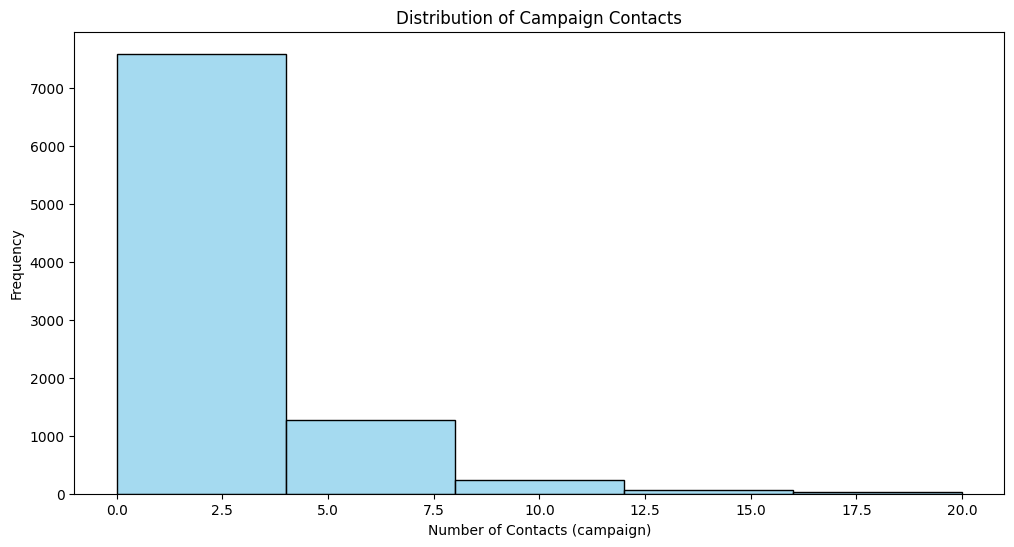

In [48]:
plt.figure(figsize=(12, 6))
sb.histplot(data=df,x=df.campaign,bins=5,binrange=(0,20),color='skyblue')
plt.title('Distribution of Campaign Contacts')
plt.xlabel('Number of Contacts (campaign)')
plt.ylabel('Frequency')
plt.show()

In [49]:
df.poutcome.value_counts()

unknown    6757
failure    1050
success     955
other       458
Name: poutcome, dtype: int64

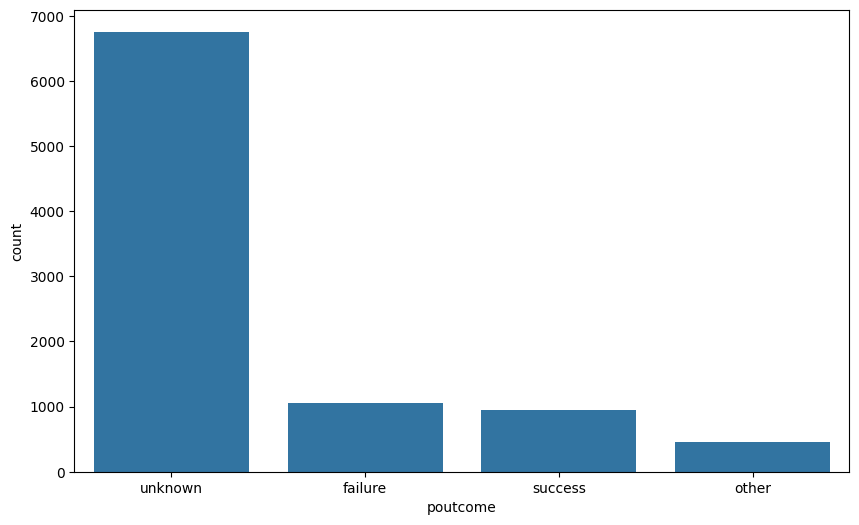

In [52]:
plt.figure(figsize=(10, 6))
sb.countplot(data=df,x='poutcome')

plt.show()

In [53]:
df.previous.value_counts()

0     6755
1      758
2      610
3      386
4      216
5      139
6      103
7       67
8       50
9       28
10      27
11      17
12      13
17      10
13       9
14       4
19       4
15       4
20       2
16       2
27       2
23       2
28       1
40       1
18       1
41       1
58       1
55       1
26       1
21       1
22       1
30       1
29       1
37       1
Name: previous, dtype: int64

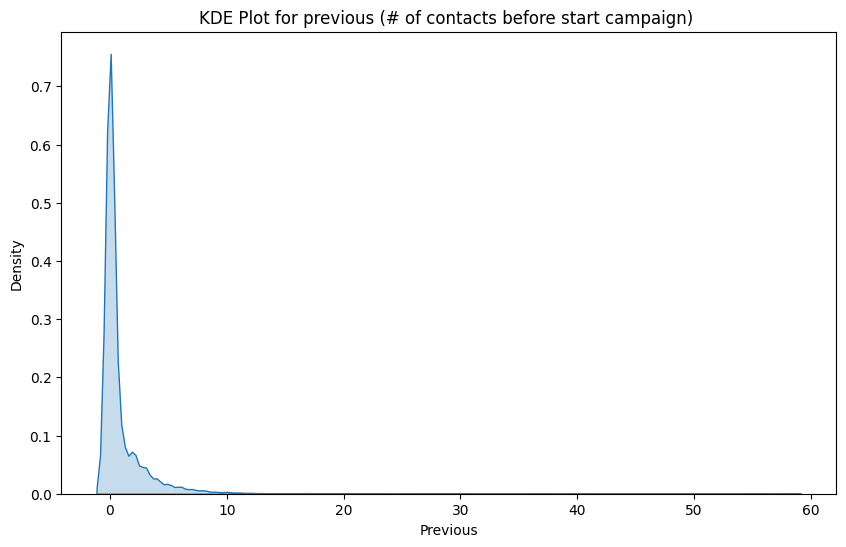

In [54]:
plt.figure(figsize=(10, 6))
sb.kdeplot(data=df, x=df.previous,fill=True)
plt.title(f'KDE Plot for previous (# of contacts before start campaign) ')
plt.xlabel("Previous")
plt.ylabel('Density')
plt.show()

# Applying One-Hot Encoding

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
# Selecting only the categorical columns for one-hot encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Splitting features (X) and target variable (y)
X = df.drop('deposit', axis=1)  # Features
y = df['deposit']  # Target variable

# Convert 'yes' and 'no' to 1 and 0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Applying one-hot encoding to the selected columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

In [23]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [24]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42)
}

In [25]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy for {name}: {accuracy:.2f}')

    print('\nClassification Report:')
    print(classification_report(y_test, predictions))

    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predictions))


Training Logistic Regression...
Accuracy for Logistic Regression: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       936
           1       0.78      0.78      0.78       908

    accuracy                           0.78      1844
   macro avg       0.78      0.78      0.78      1844
weighted avg       0.78      0.78      0.78      1844


Confusion Matrix:
[[733 203]
 [203 705]]

Training Decision Tree...
Accuracy for Decision Tree: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       936
           1       0.77      0.77      0.77       908

    accuracy                           0.77      1844
   macro avg       0.77      0.77      0.77      1844
weighted avg       0.77      0.77      0.77      1844


Confusion Matrix:
[[724 212]
 [211 697]]

Training Random Forest...
Accuracy for Random Forest: 0.84

Classification Report

From the above tests, we observe that XGBoost has the highest accuracy followed by randomforest and the least is for SVM. Hence, we will be creating the model based on XGBoost.

In [26]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

In [27]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [28]:
# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

In [29]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, xgb_predictions)
print(f'Accuracy for XGBoost: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, xgb_predictions))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, xgb_predictions))

Accuracy for XGBoost: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       936
           1       0.82      0.90      0.86       908

    accuracy                           0.86      1844
   macro avg       0.86      0.86      0.86      1844
weighted avg       0.86      0.86      0.86      1844


Confusion Matrix:
[[760 176]
 [ 90 818]]


In [30]:
print(xgb_predictions)

[0 1 0 ... 1 0 1]


In [31]:
# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_predictions})

# Display the DataFrame
print(result_df)

      Actual  Predicted
0          0          0
1          1          1
2          0          0
3          1          1
4          1          1
...      ...        ...
1839       1          0
1840       0          0
1841       1          1
1842       0          0
1843       1          1

[1844 rows x 2 columns]


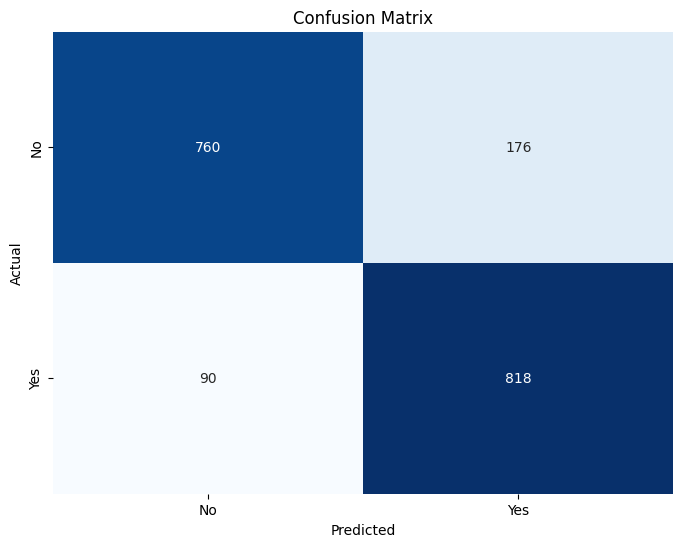

In [33]:
cm = confusion_matrix(y_test, xgb_predictions)

# Create a figure of the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
from google.colab import drive
import pickle

In [36]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Save the trained model to Google Drive
model_filename = '/content/drive/My Drive/xgboost_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

# Load the saved model from Google Drive
loaded_model = None
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Use the loaded model to make predictions
loaded_predictions = loaded_model.predict(X_test)

# Evaluate the loaded model's performance
accuracy_loaded_model = accuracy_score(y_test, loaded_predictions)
print(f'Accuracy for Loaded XGBoost Model: {accuracy_loaded_model:.2f}')

Accuracy for Loaded XGBoost Model: 0.86
